### RESOLUCION TALLER 3

### Integrantes:
### - ELIZABETH NICOLE LINARES CAMUS (202116312)

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

### 1. Empezamos con la unión de bases de datos

In [2]:
educacion=pd.read_stata("PANEL_DE_EDUCACION(2019).dta")
educacion['año']=educacion.ano.dt.year
educacion2005=educacion.loc[educacion['año']==2005]

In [3]:
salud=pd.read_stata("PANEL_SALUD_Y_SERVICIOS.dta")
salud['año'] = salud['ano'].astype(int)
salud2005=salud.loc[salud['año']==2005]

In [4]:
conflicto=pd.read_stata("PANEL_CONFLICTO_Y_VIOLENCIA(2020).dta")
conflicto['año'] = conflicto['ano'].astype(int)
conflicto=conflicto.drop(columns=['ano'])
conflicto2005=conflicto.loc[conflicto['año']==2005]

In [5]:
Base1=pd.merge(educacion2005,salud2005, on=["codmpio"])
BaseTotal=pd.merge(Base1, conflicto2005, on=['codmpio'])

In [7]:
BaseTotal.head(5)

,codmpio,ano_x,pobsimple_primaria,pobsimple_secund,asistesc,asistesc_5_a_24,librosleidosprom,anos_est_mun,per_alfa,ind_alfa,...,desplazados_recepcion,hurto_pers,hurto_resi,hurto_auto,hurto_moto,hurto_comer,hurto_entfin,hurto_vehi,hurto,año
0,5001.0,2005-01-01,170779.0,232300.0,28.395739,64.524254,1.13,10.181974,1527700.0,92.226685,...,19880.0,3166.0,530.0,1349.0,1359.0,714.0,9.0,2708.0,7118.0,2005
1,5002.0,2005-01-01,1996.0,2352.0,22.539375,54.017979,0.39,6.274856,11900.0,88.213493,...,320.0,3.0,4.0,0.0,0.0,2.0,0.0,0.0,9.0,2005
2,5004.0,2005-01-01,266.0,318.0,29.400293,63.539192,0.75,7.427028,1364.0,92.852280,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
3,5021.0,2005-01-01,366.0,426.0,28.191339,60.892387,0.79,7.065300,2358.0,92.181389,...,88.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2005
4,5030.0,2005-01-01,2951.0,3423.0,25.729763,58.751202,0.50,7.671256,17074.0,91.061333,...,62.0,3.0,1.0,0.0,1.0,7.0,0.0,1.0,12.0,2005


In [8]:
BaseTotal.columns

Index(['codmpio', 'ano_x', 'pobsimple_primaria', 'pobsimple_secund',
       'asistesc', 'asistesc_5_a_24', 'librosleidosprom', 'anos_est_mun',
       'per_alfa', 'ind_alfa',
       ...
       'desplazados_recepcion', 'hurto_pers', 'hurto_resi', 'hurto_auto',
       'hurto_moto', 'hurto_comer', 'hurto_entfin', 'hurto_vehi', 'hurto',
       'año'],
      dtype='object', length=986)

### 1.2 Continuamos con las estadisticas descriptivas

En este caso, estudiaremos dos modelos, el primero es un modelo mco que estudiará cuál es el efecto de la tasa de mortalidad infantil sobre la asistencia en educación. Con este primer modelo se quiere ver como el nivel de salud afecta a la educación en un municipio. 

Para el segundo modelo, será un logit que estudiará como la violencia en un municipio puede afectar el nivel de educación en un municipio. Para esto se creará una dummy 0 si la asistencia a la educación no es mayor al promedio y 1 si sí lo es. Y como variables explicativas se presentarán los ataques hacia la comunidad. 

Se eligió el año 2005 por la disponibilidad de datos

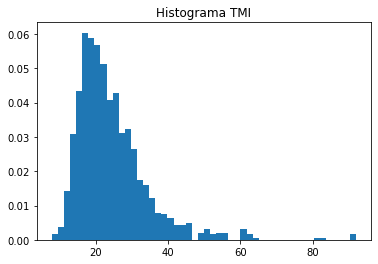

In [9]:
#Histograma TMI

plt.hist(BaseTotal.TMI,bins=50,density=True);
plt.title('Histograma TMI')
plt.savefig('tmi.png')
plt.show();

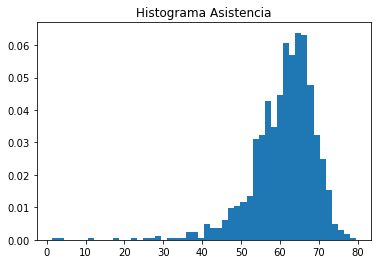

In [10]:
#Histograma Asistencia

plt.hist(BaseTotal.asistesc_5_a_24,bins=50,density=True);
plt.title('Histograma Asistencia')
plt.savefig('asis.png')
plt.show();

In [11]:
nombres=["TMI", "asistesc_5_a_24", "tpobc_FARC", "tpobc_ELN", "tpobc_DESC", "tpobc_AUC"]
máximo=[BaseTotal.TMI.max(),BaseTotal.asistesc_5_a_24.max(),BaseTotal.tpobc_FARC.max(),BaseTotal.tpobc_ELN.max(), BaseTotal.tpobc_DESC.max(), BaseTotal.tpobc_AUC.max()]
mínimo=[BaseTotal.TMI.min(), BaseTotal.asistesc_5_a_24.min(), BaseTotal.tpobc_FARC.min(), BaseTotal.tpobc_ELN.min(), BaseTotal.tpobc_DESC.min(), BaseTotal.tpobc_AUC.min()]
promedio=[BaseTotal.TMI.mean(), BaseTotal.asistesc_5_a_24.mean(), BaseTotal.tpobc_FARC.mean(), BaseTotal.tpobc_ELN.mean(), BaseTotal.tpobc_DESC.mean(), BaseTotal.tpobc_AUC.mean()]
desv=[BaseTotal.TMI.std(), BaseTotal.asistesc_5_a_24.std(), BaseTotal.tpobc_FARC.std(), BaseTotal.tpobc_ELN.std(), BaseTotal.tpobc_DESC.std(), BaseTotal.tpobc_AUC.std()]

In [12]:
diccionario={"Variables": nombres,"Máximo":máximo, "Mínimo":mínimo, "Promedio":promedio, "Desviación Estándar":desv}
estad=pd.DataFrame(diccionario)
estad.set_index("Variables", inplace=True)
estad

,Máximo,Mínimo,Promedio,Desviación Estándar
Variables,,,,
TMI,91.970000,7.840000,24.404225,9.982458
asistesc_5_a_24,79.609177,1.298701,60.938477,8.304959
tpobc_FARC,13.000000,0.000000,0.355993,1.034895
tpobc_ELN,5.000000,0.000000,0.079606,0.396849
tpobc_DESC,270.000000,0.000000,2.908766,12.899123
tpobc_AUC,6.000000,0.000000,0.111807,0.490760


### 2. Regresión 

### MCO

¿Cómo la salud afecta a la educación?

Se estudiará como variable proxy de la salud la tasa de mortalidad y para la educación se usará el porcentaje de asistencia a clases.

In [13]:
formula = 'asistesc_5_a_24 ~ TMI'
y,X = patsy.dmatrices(formula, BaseTotal, return_type='matrix')
modelo = sm.OLS(y,X)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:        asistesc_5_a_24   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           7.40e-51
Time:                        13:19:15   Log-Likelihood:                -3528.6
No. Observations:                1030   AIC:                             7061.
Df Residuals:                    1028   BIC:                             7071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6974      0.717    100.019      0.0

In [14]:
mco=resultado.summary2()
mco1=mco.tables[1]
mco2=mco.tables[0]

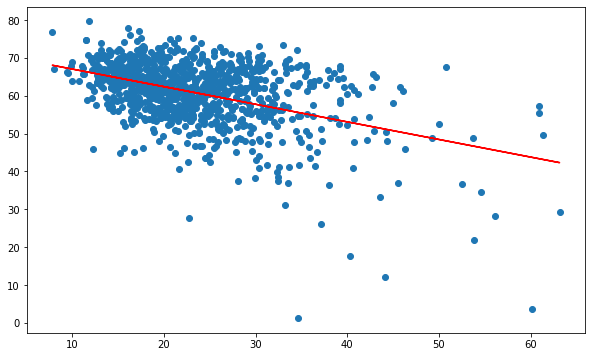

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y)
plt.plot(X[:,1], resultado.predict(X), c='r')
plt.savefig("r_mco.png")
plt.show()

Resultado: Tendencia negativa, la tasa de mortalidad tiene una relación negativa con la asistencia a las clases. La salud sí llega a ser un componente al cual tenemos que estar pendiente, pues puede afectar a la asistencia en clases a una comunidad. El nivel de educación puede verse perjudicado. 

### Logit

Para este modelo se quiere estudiar cuando hay mayor o menor probabilidad de que la asistencia a clases sea mayor al promedio dependiente del nivel de ataques hacia la comunidad(nivel de violencia). Para esto se creo una variable dummy, 1= mayor al promedio 0= menor al promedio, y además se está utilizando las variables que cuantifican los ataques hacia la comunidad ya sea de ELN, FARC, DESC( desconocidos) y AUC. 

In [18]:
#Se crea la variable Dummy 1= arriba del promedio 0=abajo de promedio

BaseTotal["educ"]=1
BaseTotal.loc[BaseTotal.asistesc_5_a_24<BaseTotal.asistesc_5_a_24.mean(), "educ"]=0

In [19]:
formula2 = 'educ ~ tpobc_FARC + tpobc_ELN + tpobc_DESC + tpobc_AUC'
w,Z = patsy.dmatrices(formula2, BaseTotal)

In [20]:
modelo_logit = sm.Logit(w, Z)
resultado_logit = modelo_logit.fit()
print(resultado_logit.summary())

Optimization terminated successfully.
         Current function value: 0.643640
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   educ   No. Observations:                 1118
Model:                          Logit   Df Residuals:                     1113
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                 0.03458
Time:                        13:27:30   Log-Likelihood:                -719.59
converged:                       True   LL-Null:                       -745.37
Covariance Type:            nonrobust   LLR p-value:                 1.709e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4300      0.069      6.259      0.000       0.295       0.565
tpobc_FARC    -0.3729      0.

In [22]:
print(resultado_logit.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                   educ
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tpobc_FARC    -0.0848      0.016     -5.191      0.000      -0.117      -0.053
tpobc_ELN     -0.0700      0.041     -1.701      0.089      -0.151       0.011
tpobc_DESC     0.0215      0.005      4.505      0.000       0.012       0.031
tpobc_AUC      0.0415      0.039      1.058      0.290      -0.035       0.119


Resultado: No todos los resultados son significativos, pero se puede ver como la probabilidad de estar encima del promedio baja cuando hay ataques de parte de las FARC O DE ELN

In [21]:
logit=resultado_logit.summary2()
logit1=logit.tables[1]
logit2=logit.tables[0]

### 3. Diagramación en Excel

### Hoja 1

In [23]:
writer = pd.ExcelWriter('Estimacion.xlsx',
                        engine='xlsxwriter')

workbook=writer.book

In [24]:
estad

,Máximo,Mínimo,Promedio,Desviación Estándar
Variables,,,,
TMI,91.970000,7.840000,24.404225,9.982458
asistesc_5_a_24,79.609177,1.298701,60.938477,8.304959
tpobc_FARC,13.000000,0.000000,0.355993,1.034895
tpobc_ELN,5.000000,0.000000,0.079606,0.396849
tpobc_DESC,270.000000,0.000000,2.908766,12.899123
tpobc_AUC,6.000000,0.000000,0.111807,0.490760


In [25]:
estad.to_excel(writer,
            sheet_name='E. Descriptivas',
            header=True,
            index=True,
            startrow=2,
            startcol=0)

In [26]:
encabezado=workbook.add_format({'bold':True,
                               'text_wrap':True,
                               'font_size':15,
                               'font_color':'green',
                               'align':'center',
                               'valign':'vcenter',
                               'fg_color':'#153261',
                               'border':1})

In [27]:
hoja=writer.sheets['E. Descriptivas']

In [28]:
hoja.merge_range('A1:M1','Estadisticas Descriptivas', encabezado)

In [29]:
hoja.insert_image(2,5,'tmi.png')
hoja.insert_image(20,5,'asis.png')

### Hoja 2

In [30]:
mco1.to_excel(writer,
            sheet_name='MCO',
            header=True,
            index=True,
            startrow=1)

In [31]:
hoja2=writer.sheets['MCO']

In [32]:
encabezado2=workbook.add_format({'bold':True,
                               'text_wrap':True,
                               'font_size':15,
                               'font_color':'snow',
                               'align':'center',
                               'valign':'vcenter',
                               'fg_color':'#153261',
                               'border':1})

In [33]:
hoja2.merge_range('A1:M1','Estimación MCO', encabezado2)

In [34]:
mco2.to_excel(writer, sheet_name='MCO', startrow=6)

In [35]:
hoja2.insert_image(7,5,'r_mco.png')

### Hoja 3

In [36]:
logit1.to_excel(writer,
            sheet_name='Logit',
            header=True,
            index=True,
            startrow=1)

In [37]:
hoja3=writer.sheets['Logit']

In [38]:
encabezado3=workbook.add_format({'bold':True,
                               'text_wrap':True,
                               'font_size':15,
                               'font_color':'orangered',
                               'align':'center',
                               'valign':'vcenter',
                               'fg_color':'#153261',
                               'border':1})

hoja3.merge_range('A1:M1','Estimación Logit', encabezado3)

In [39]:
logit2.to_excel(writer, sheet_name='Logit', startrow=10)

In [40]:
writer.save()